In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
2+2

4

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


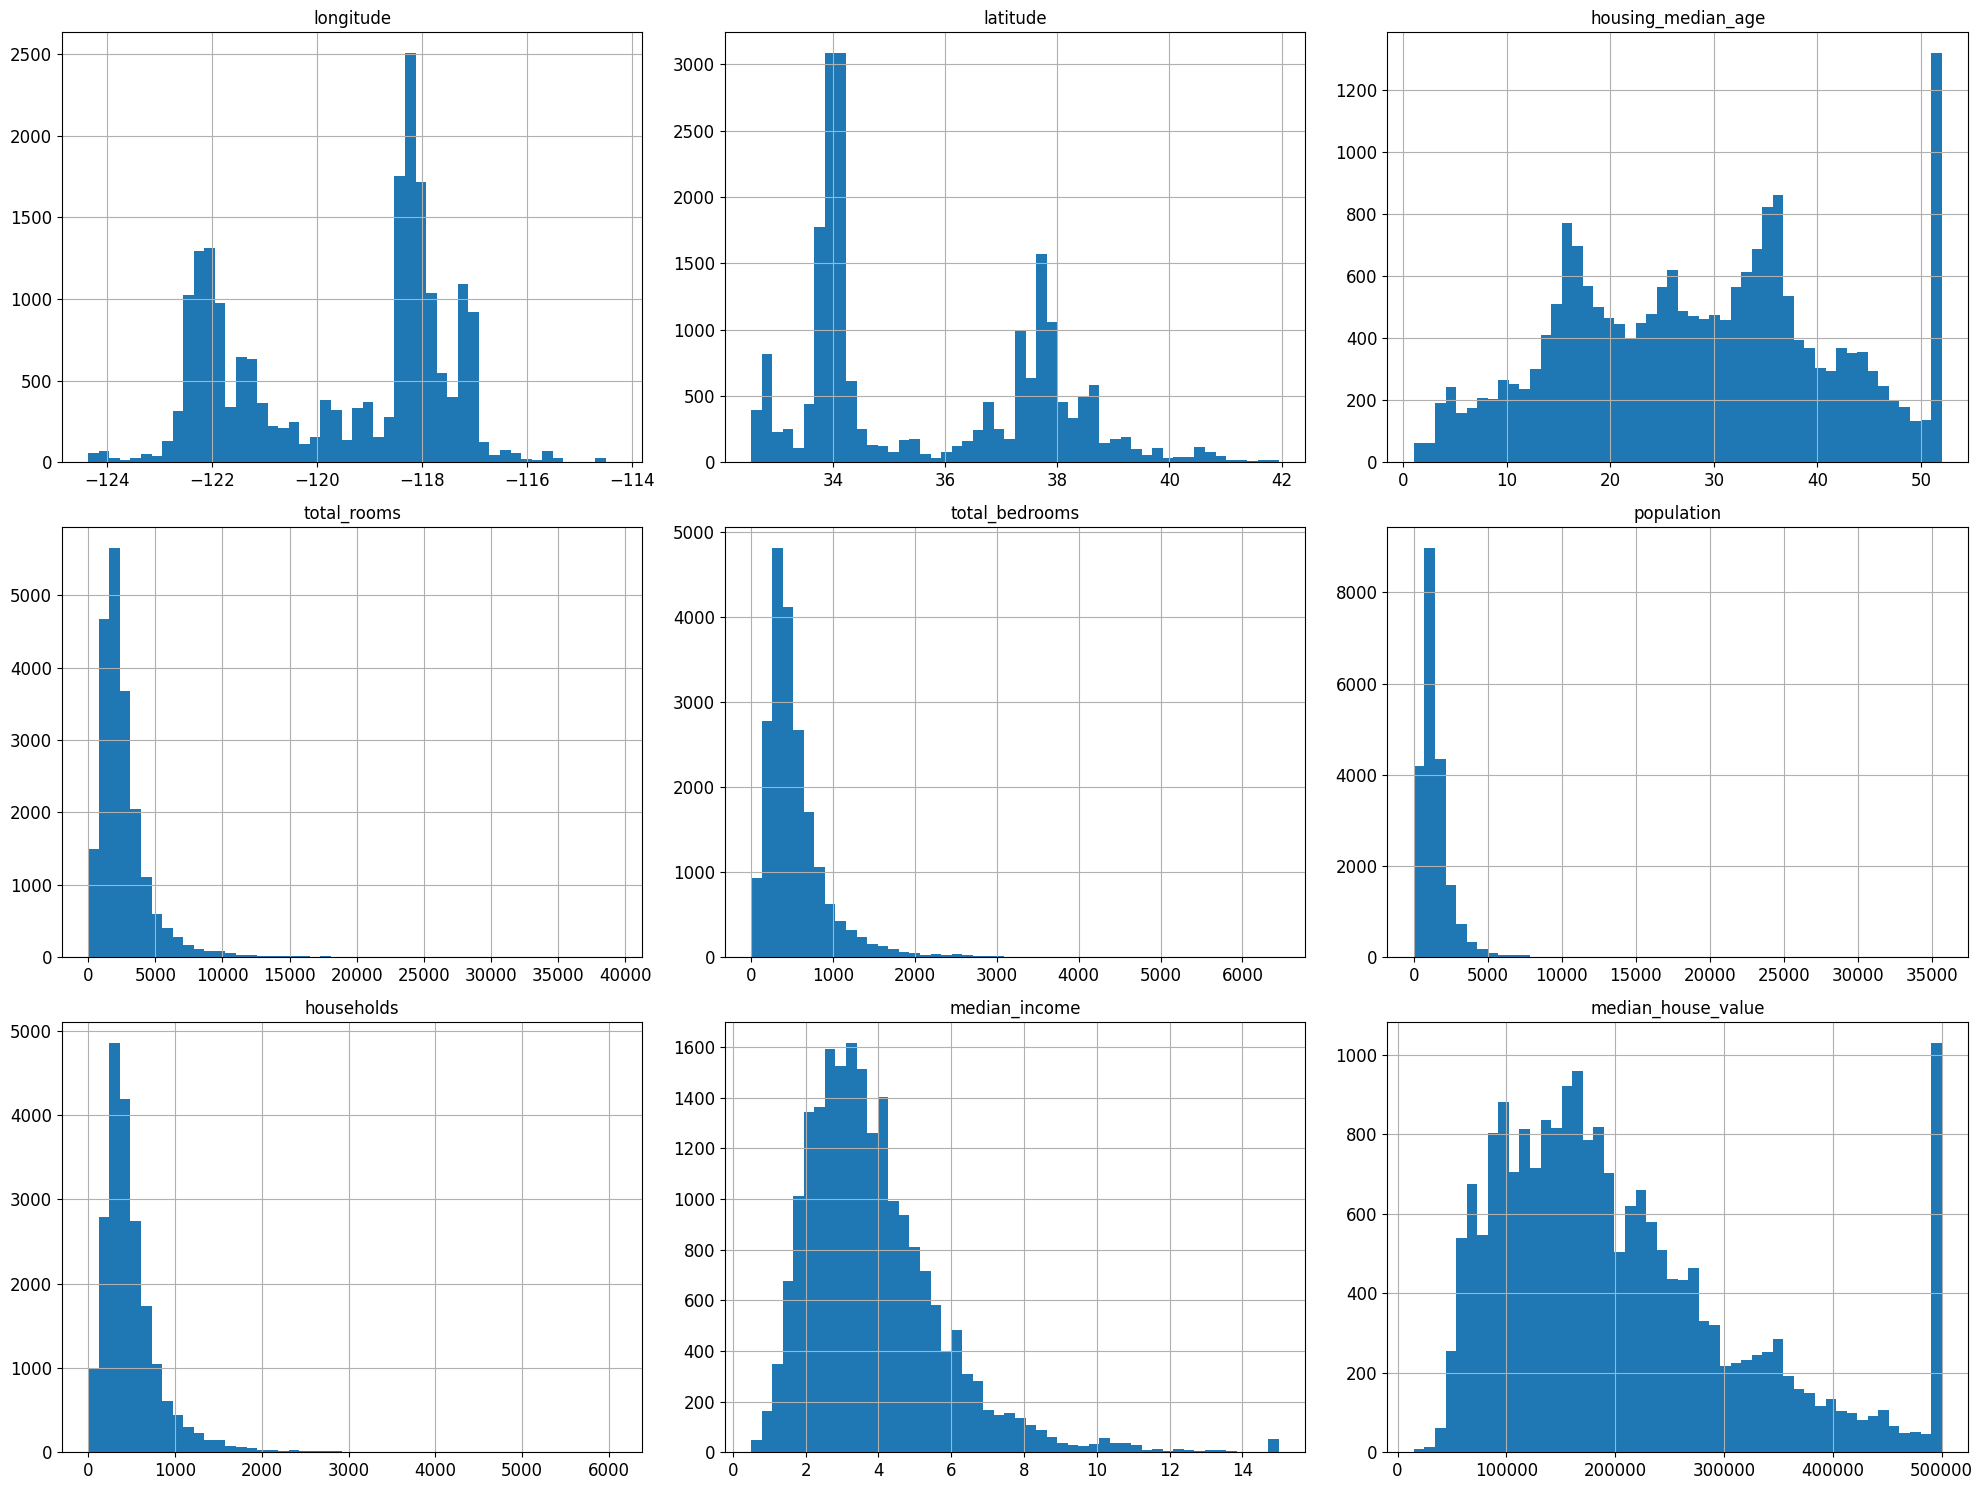

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")

#DETAILED MATHEMATICAL INTERPRETATION

## What the histogram shows
- A histogram partitions the range of a numeric attribute into contiguous intervals ("bins") and counts how many observations fall in each bin.
- If we have data x1,...,xn and bins B1,...,Bk, the count in bin j is
  $$
  n_j = \sum_{i=1}^n \mathbf{1}\{x_i \in B_j\}.
  $$
  The bin probability (empirical probability mass) is $p_j = n_j/n$.
- If the histogram is plotted as a density (height normalized by bin width), it approximates the probability density function (PDF):
  $$
  \hat f(x) \approx \frac{n_j}{n\cdot w_j}\quad\text{for }x\in B_j,
  $$
  where $w_j$ is bin width. That is, area under the bars ≈ 1.

## Axes interpretation
- x-axis: attribute values (e.g., `median_income`, `total_rooms`, `median_house_value`).
- y-axis:
  - Default in Matplotlib: counts (n_j).
  - If normalized: estimated density $\hat f(x)$ or probability $p_j$.
- Reading the plot: bar height shows relative frequency (or density) of values in that interval.

## Bin choice and its effect
- Bin width influences the trade-off between bias and variance in the histogram estimate.
- Freedman–Diaconis rule (robust automatic choice):
  $$
  h = 2\frac{\mathrm{IQR}(x)}{n^{1/3}},
  $$
  then number of bins ≈ (max-min)/h. Smaller h → more bins → noisier estimate; larger h → smoother but possibly biased.

## Basic summary statistics (moments)
- Sample mean (location):
  $$
  \bar x = \frac{1}{n}\sum_{i=1}^n x_i.
  $$
- Sample variance (spread):
  $$
  s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i-\bar x)^2.
  $$
- Median and quantiles are robust measures shown implicitly by histogram shape.

## Shape descriptors — skewness and kurtosis
- Skewness (measures asymmetry):
  $$
  g_1 = \frac{\frac{1}{n}\sum (x_i-\bar x)^3}{\left(\frac{1}{n}\sum (x_i-\bar x)^2\right)^{3/2}}.
  $$
  - g1 > 0 → right (positive) skew (long right tail).
  - g1 < 0 → left skew.
- Excess kurtosis (tailedness):
  $$
  \text{excess kurtosis} = \frac{\frac{1}{n}\sum (x_i-\bar x)^4}{\left(\frac{1}{n}\sum (x_i-\bar x)^2\right)^2} - 3.
  $$
  Positive → heavier tails than normal.

Interpretation: A strongly right-skewed histogram (common for `total_rooms`, `population`, `median_income`) suggests a long right tail — many small values and few large ones.

## Outlier detection (from histograms)
- z-score method (sensitive to outliers):
  $$
  z_i = \frac{x_i - \bar x}{s},\qquad\text{flag if }|z_i|>3.
  $$
- IQR method (robust):
  - Let Q1 and Q3 be 25% and 75% quantiles; IQR = Q3 - Q1.
  - Lower bound = Q1 - 1.5·IQR, upper bound = Q3 + 1.5·IQR.
  - Values outside these bounds are commonly treated as outliers.
- Histogram spikes at extremes often indicate clipped values (e.g., the book's housing dataset has many observations clipped at the maximum `median_house_value`), which is important to detect and handle.

## Transformations motivated by histogram shape
- For right-skewed positive variables, use log transform (or log1p to handle zeros):
  $$
  y = \log(x + 1).
  $$
  This:
  - Compresses large values, reduces skewness.
  - Stabilizes variance if a multiplicative error model holds.
- After transforming, re-plot histograms to check approximate symmetry (helpful for linear models).

## Relationship with modeling
- If the target `median_house_value` is skewed:
  - Consider predicting $\log(\text{median_house_value})$ to reduce heteroscedasticity and extreme influence.
- For features:
  - Skewed features often benefit from log transform before scaling.
  - Use robust scaling (median and IQR) when many outliers are present.
- Correlation between attributes: compute Pearson correlation
  $$
  r_{xy} = \frac{\mathrm{cov}(x,y)}{s_x s_y},\qquad \mathrm{cov}(x,y)=\frac{1}{n-1}\sum (x_i-\bar x)(y_i-\bar y).
  $$
  Pair histograms and scatter plots (or a scatter matrix / heatmap) to detect linear relationships.

## Quick, concrete notes for this notebook's plots
- `housing.hist(bins=50, figsize=(20,15))` produces 50 bins per numeric column. For n in the thousands, 50 is reasonable but you should try Freedman–Diaconis or log-scale bins for long tails.
- Typical observations in this dataset:
  - `median_income`: Right-skewed — use log1p for linear models.
  - `total_rooms`, `total_bedrooms`, `population`: Long right tails; consider log transform or robust scaling.
  - `median_house_value`: Often shows a spike at the dataset's cap (e.g., 500000) — a sign of censoring/clipping (not natural distribution).
  - `housing_median_age`: can be multimodal (different neighbourhood age clusters).
- Because Matplotlib's default y-axis is counts, interpret bar heights as absolute counts unless you call `density=True`.

## Suggested complementary plots (and why)
- Boxplot per attribute — explicitly shows median, IQR, whiskers, and outliers.
- KDE (kernel density estimate) — smooth estimate of PDF; useful when you want a continuous approximation.
- ECDF (empirical CDF) — more robust view of tails and quantiles.
- Scatter matrix or scatter + color by `median_income` — inspects pairwise relations and non-linear patterns.
- Correlation heatmap + Pearson r formula — quantify linear associations.

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [10]:
test_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

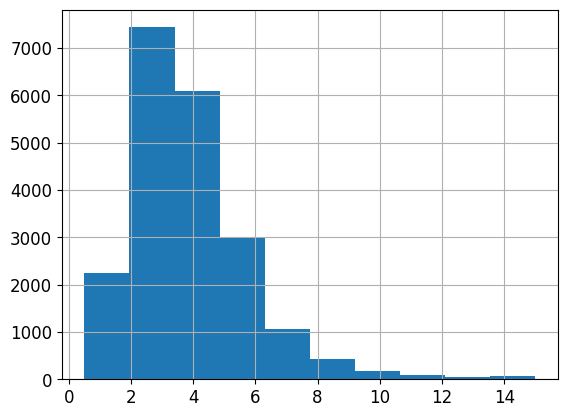

In [11]:
housing["median_income"].hist()

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])



<Axes: >

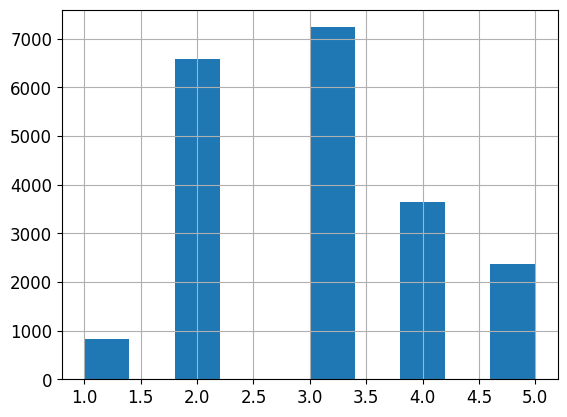

In [13]:
housing["income_cat"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [15]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [16]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100


compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Creating duplicate file for data inspection


In [ ]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot


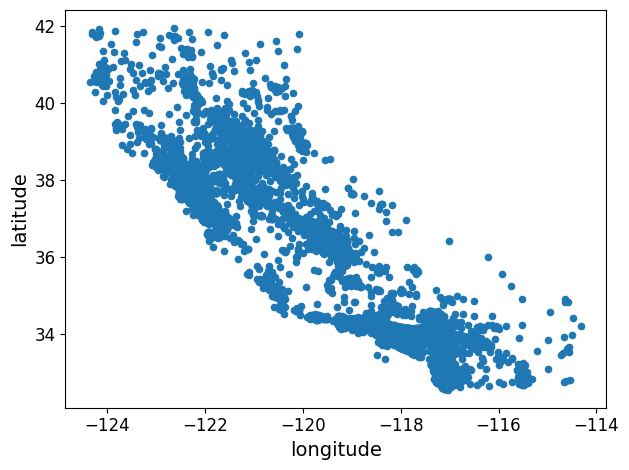

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


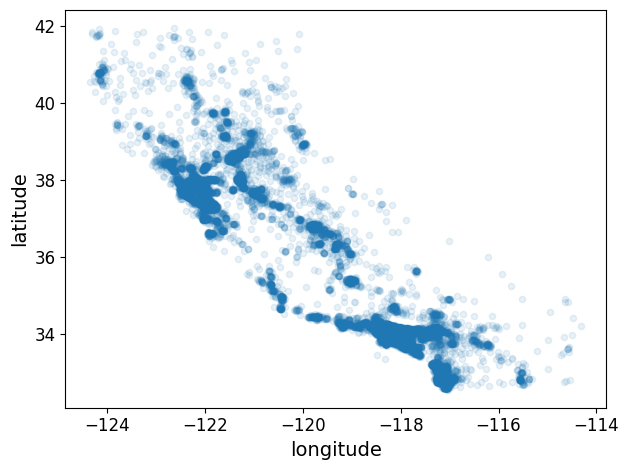

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


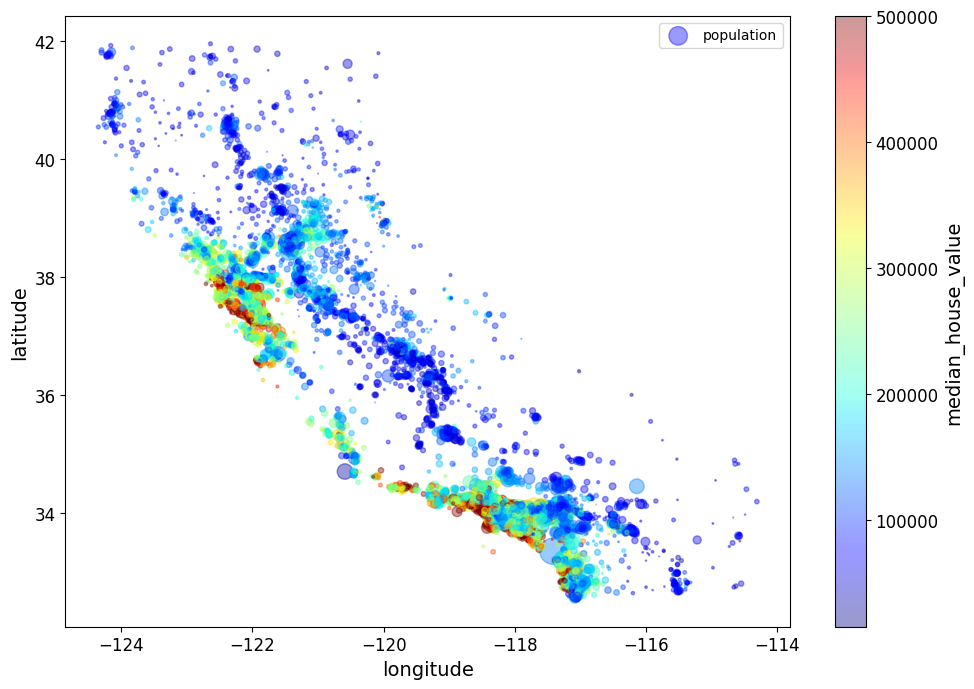

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [22]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x27d9b816fd0>)

### Plotting the data on the real California map!

Saving figure california_housing_prices_plot


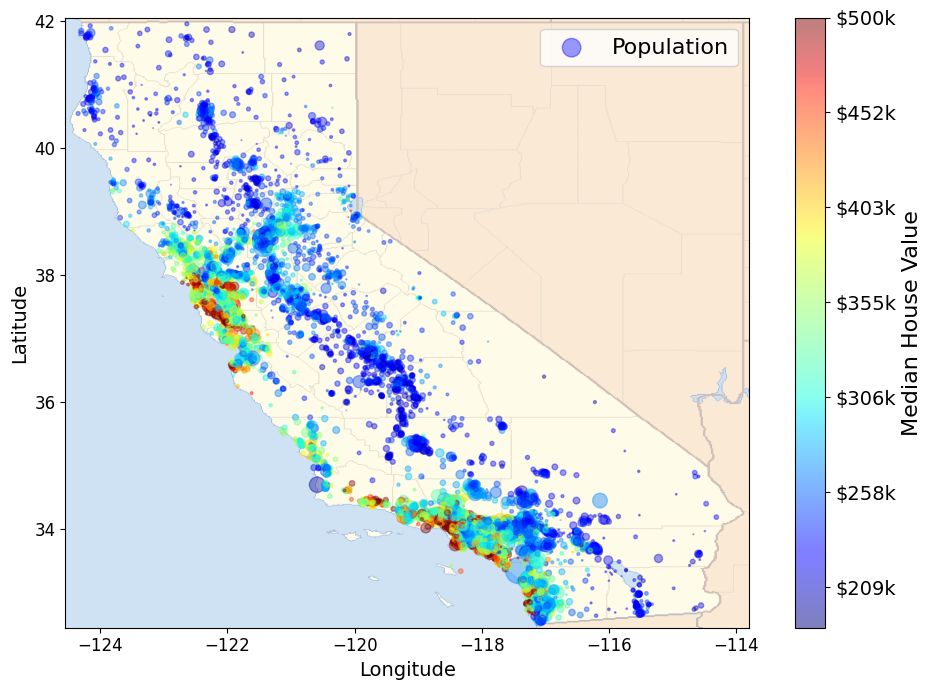

In [24]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Corellations

In [ ]:
corr_matrix = housing.corr()

ValueError: could not convert string to float: 'INLAND'

#### Expected output

median_house_value    1.000000  
median_income         0.687160  
total_rooms           0.135097  
housing_median_age    0.114110  
households            0.064506  
total_bedrooms        0.047689  
population           -0.026920  
longitude            -0.047432  
latitude             -0.142724   
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


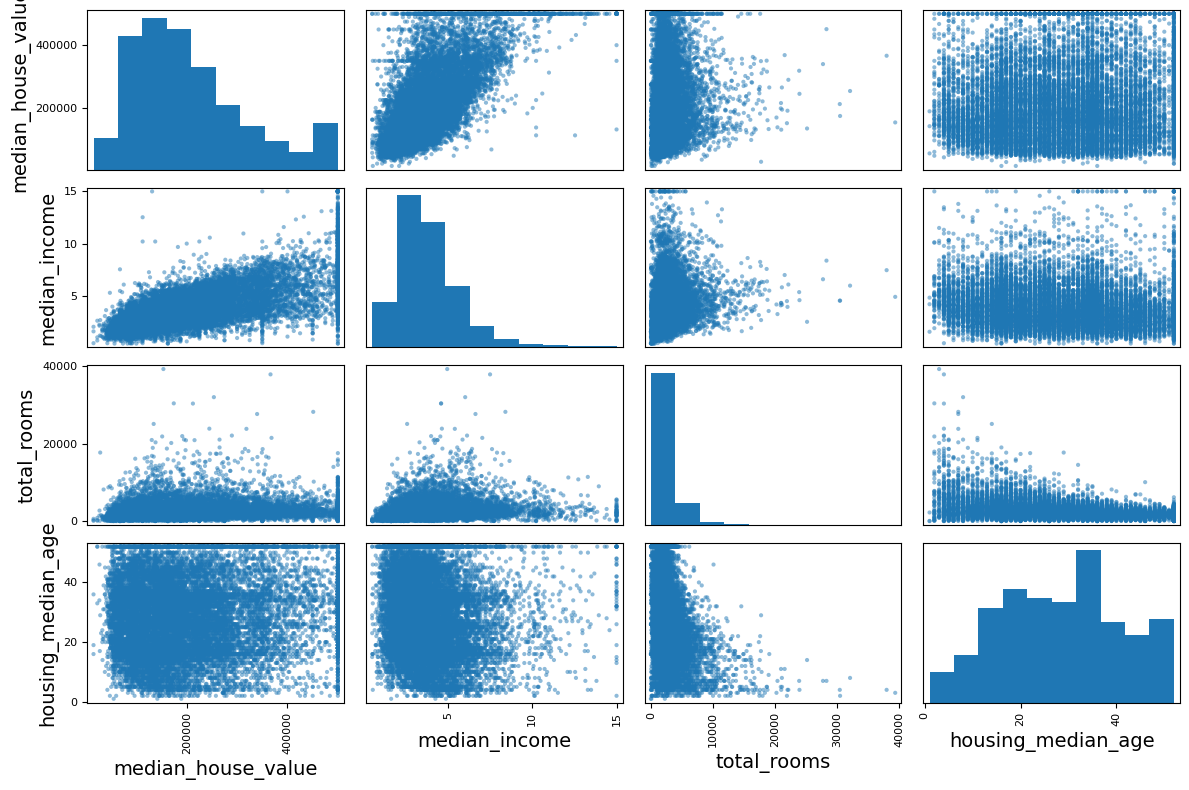

In [28]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


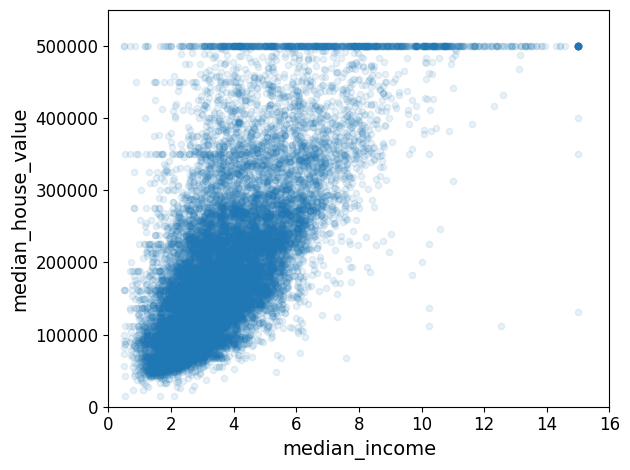

In [29]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")